In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [10]:
from tensorflow.keras.models import load_model

encoder = load_model('../palm_encoder/model')

In [11]:
encoder.weights

[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 1, 3) dtype=float32, numpy=
 array([[[[-0.16780506, -0.01066095, -0.01258653]],
 
         [[-0.38503388, -0.01167721,  0.18864717]],
 
         [[ 0.304019  ,  0.12784113, -0.26329708]]],
 
 
        [[[-0.16607678,  0.2232789 ,  0.18751232]],
 
         [[ 0.3124137 , -0.19771485,  0.28912133]],
 
         [[-0.4531151 , -0.04370835,  0.05027026]]],
 
 
        [[[ 0.24362247,  0.0712885 , -0.2716377 ]],
 
         [[ 0.12563075,  0.09941966,  0.29580373]],
 
         [[ 0.19562294,  0.17329085,  0.09293357]]]], dtype=float32)>,
 <tf.Variable 'conv2d/bias:0' shape=(3,) dtype=float32, numpy=array([ 0.04796812, -0.11776681, -0.09618492], dtype=float32)>,
 <tf.Variable 'conv2d_1/kernel:0' shape=(3, 3, 3, 3) dtype=float32, numpy=
 array([[[[ 0.04662941,  0.00680585, -0.06058997],
          [ 0.34343502,  0.10342894,  0.11373609],
          [-0.01340497, -0.31822774,  0.19669941]],
 
         [[-0.23993513, -0.18616366, -0.18187341],
          

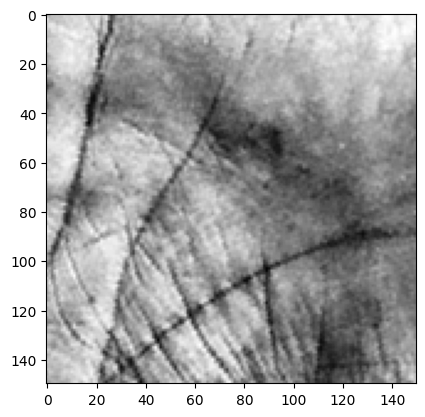

In [14]:
palm = cv2.imread('../../IITD Palmprint V1/Segmented/Left/001_1.bmp',0)
plt.imshow(palm, cmap='gray')

In [15]:
palm.shape

(150, 150)

In [16]:
# straight = encoder.predict(palm.reshape(1,22500))
straight = encoder.predict(palm.reshape(-1, 150, 150, 1))
print(straight)

1/1 [==============================] - 2s 2s/step
[[ 98.96495    0.         0.         0.        74.560295 138.13571
   15.1047   120.57038  143.13943  108.73879    0.         0.
    0.         0.        43.857162  62.630432   0.         0.
    0.         0.         0.        24.412413  79.40958    0.
   72.03639    0.         0.        59.94054   65.158226  48.14004
  142.82335    0.      ]]


In [36]:
palm = cv2.imread('../../IITD Palmprint V1/Segmented/Left/028_1.bmp',0)
rotated = encoder.predict(palm.reshape(-1, 150, 150, 1))
print(rotated)

1/1 [==============================] - 0s 118ms/step
[[ 98.83724    0.         0.         0.        83.51516  143.72552
   26.535198 115.669106 130.05421   89.3089     0.         0.
    0.         0.        41.67309   68.096306   0.         0.
    0.         0.         8.611211  20.823727  82.56504    0.
   70.57016    0.         0.        56.49074   60.586784  51.837135
  123.535774   0.      ]]


In [38]:
np.mean(np.abs(straight - rotated))

3.7186475

In [46]:
diff_palm = cv2.imread('../../IITD Palmprint V1/Segmented/Left/002_5.bmp',0)

diff = encoder.predict(diff_palm.reshape(-1, 150, 150, 1))
print(diff)
np.mean(np.abs(straight - diff))

1/1 [==============================] - 0s 166ms/step
[[ 90.32227     0.          0.          0.         55.536293  120.024574
    9.833842  109.02415   131.63124    93.90715     0.          0.
    0.          0.         37.044636   51.11239     0.          0.
    0.          0.          3.3481393  21.34904    69.3635      0.
   63.656418    0.          0.         46.479343   65.4107     50.430935
  118.380455    0.       ]]


5.3921976

-------

## Connecting to AWS SageMaker Endpoint